In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

The sky diving problem

$$
\begin{gathered}
\frac{d v_x}{d t}=-\frac{b}{m} \sqrt{v_x^2+v_y^2} \cdot v_x \\
\frac{d v_y}{d t}=-g-\frac{b}{m} \sqrt{v_x^2+v_y^2} \cdot v_y
\end{gathered}
$$

$\vec{S}=\left(v_x, v_y\right)$. To solve ODEs in python,
1. define function that takes in $t$ and $\vec{S}$ and returns $d \vec{S} / d t$

In [ ]:
# dSdt ist der die Abl der Strecke und somit die geschwindigkeit
# die geschwindigkeit kann ich als integral der beschleunigung darstellen
dvxdt = lambda vx, vy: -b*vx*(vx**2+vy**2)**0.5/m
dvydt = lambda vx, vy: -g-b*vy*(vx**2+vy**2)**0.5/m
dSdt = (vx**2+vy**2)**0.5
#### FALSCH! S ist nicht die  Strecke sondern ein System.

In [6]:
def dSdt(S, t, g, m, b0):
    vx = S[0]
    vy = S[1]
    return [
           -b/m *np.sqrt(vx**2+vy**2) * vx,
        -g -b/m *np.sqrt(vx**2+vy**2) * vy
    ]

2. Supply the function and initial conditions to the ODE solver. Provide the times at which you want the solution

In [8]:
t = np.linspace(0, 20, 100)
m = 80
g = 9.81
vt = -55 # m/s Termianlgeschwindigkeit
b = m*g/vt**2 # Errechnung des Wiederstandbeiwertes mittels der Termianlgeschwindigkeit
v0x, v0y = 50, 0
sol = odeint(dSdt, y0 =[v0x, v0y], t=t, args=(g, m, b))

In [9]:
sol

array([[ 50.        ,   0.        ],
       [ 48.4136722 ,  -1.9503758 ],
       [ 46.92251143,  -3.84158835],
       [ 45.51576815,  -5.67850589],
       [ 44.18400832,  -7.46515092],
       [ 42.91893325,  -9.20481567],
       [ 41.71323236, -10.90016142],
       [ 40.56046274, -12.55330491],
       [ 39.45494809, -14.16589541],
       [ 38.39169442, -15.73918379],
       [ 37.36631783, -17.27408526],
       [ 36.37498198, -18.77123662],
       [ 35.41434295, -20.23104872],
       [ 34.48149978, -21.65375419],
       [ 33.57394977, -23.03945071],
       [ 32.68954736, -24.38813984],
       [ 31.8264662 , -25.69976151],
       [ 30.98316393, -26.97422406],
       [ 30.15834945, -28.21143014],
       [ 29.35095247, -29.4112985 ],
       [ 28.5600955 , -30.57378167],
       [ 27.7850677 , -31.69888042],
       [ 27.02530123, -32.7866543 ],
       [ 26.28034944, -33.83722972],
       [ 25.54986731, -34.85080487],
       [ 24.83359377, -35.82765237],
       [ 24.13133591, -36.76812017],
 

In [10]:
vx = sol.T[0]
vy = sol.T[1]

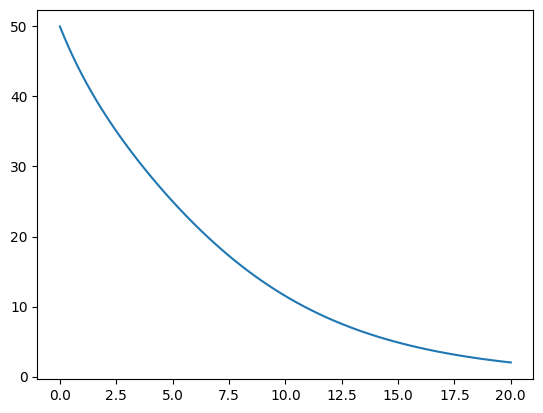

In [11]:
plt.plot(t, vx)

How long until one reaches terminal velocity?

In [16]:
dif = np.abs(vy - vt)
for i, vel in enumerate(dif):
    if vel < 0.01*np.abs(vt):
        print(t[i])
        break

17.171717171717173


In [19]:
i = np.abs(vy - vt) < 0.01*np.abs(vt)	# conditionale zuordnung
t[i]

array([17.17171717, 17.37373737, 17.57575758, 17.77777778, 17.97979798,
       18.18181818, 18.38383838, 18.58585859, 18.78787879, 18.98989899,
       19.19191919, 19.39393939, 19.5959596 , 19.7979798 , 20.        ])